In [1]:
########## 24 September 2018 - Alec S. Hirschauer ##########
# Today I am going to make CMDs and CCDs for NGC 6822 using Python
# drawing from the Khan et al. (2015) Spitzer data set
# matched with the Sibbons et al. (2012) WFCAM/UKIRT data set.
#
# I have run a CasJobs query to create a new table of values
# locally saved as a .csv file, with all relevant color terms
# already built in to the spreadsheet.
#
# These plots are based on the suggestion of Margaret Meixner:
# K vs J-K, [3.6] vs J-[3.6], [3.6] vs [3.6]-[8.0], [8.0] vs J-[8.0]

In [2]:
# In addition to the CMDs (but not CCDs) discussed above,
# I am going to make histograms of the colors.
#
# Libby Jones suggested that these will be useful to determine
# where the color cuts will be in the CMDs themselves
# for identification of the O- and C-rich AGB stars.
#
# Essentially, where in the histograms there is an inflection
# point (toward the red side of the distribution) gives an
# indication of the change in the stellar population at that color.
#
# The resultant vertical line will be a good place to start,
# however Libby further cautioned that an inclined boundary line
# is a more truthful segregator.

In [3]:
# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
# This last line is necessary for the number density histograms.

In [4]:
# Read in my data from a .csv file saved locally.
phot_data = pd.read_csv('CMDKhanANDSibbonsHOME_ahirschauer.csv')
# This is a table of values with 30,745 rows which contains the photometric data of
# the Khan et al. (2015) catalog matched to sources from Sibbons et al. (2012)
# with an "OR" command, then downloaded from MAST CasJobs.
#print phot_data

In [5]:
# In my first iteration of making CMDs, I found a few erroneous color values well in excess
# of the standard plot boundaries, which made the axes ludicrously proportioned.
# While clearly I could simply define the scale of the axes such that these
# outliers are skipped, if I wanted to do any analysis of the dataset as a whole
# it is more useful for me to trim them.
#
# These erroneous color values were all in the vicinity of +/-10,000, which come from
# the fact that 'null' values in the catalog of photometric sources had been set to "-9999"
# and therefore a small value minus -9,999 becomes roughly 10,000,
# or -9,999 minus a small value becomes roughly -10,000.
#
# Rather than set individual cuts for every afflicted column (as I had tried to do earlier),
# I am making a global cut of the whole dataframe so that no value is outside of the range
# of -500.0 to +500.0, which hopefully encompasses everything useful (including RA & Dec).
#
# phot_data = phot_data[(phot_data < 500.0) & (phot_data > -500.0)]
#
# print phot_data
#
# The above command trims the 'phot_data' dataframe,
# but later on when I plot and/or analyze the data,
# I'd like to specify that we're dealing with a "filtered" data set,
# so the command below does that.
#
# filter_phot_data = phot_data
#
# print filter_phot_data
#
filter_phot_data = phot_data.copy()
#print filter_phot_data
filter_phot_data = filter_phot_data[(filter_phot_data.values < 500.0) &
                                   (filter_phot_data.values > -500.0)]

In [6]:
# For the histograms, I have created new .csv files which have the specific colors'
# information: ID, RA, Dec, magnitudes, magnitude errors, color, color error.
#
# I have pre-trimmed the bogus data from these tables already, so there's no need
# to get rid of the whacky 'null' values converted to "-9999" values
# (which, when subtracted from any other value, gives another bogus value)
# like I did in the previous cell with the "full" catalog.
#
jMINUSkDATA = pd.read_csv('jMINUSk.csv')
jMINUSthreesixDATA = pd.read_csv('jMINUSthreesix.csv')
threesixMINUSeightzeroDATA = pd.read_csv('threesixMINUSeightzero.csv')
jMINUSeightzeroDATA = pd.read_csv('jMINUSeightzero.csv')
#
# After comparing cells where I made CMDs with the "filter_phot_data" data and with
# the specific colors' information above, I have found that they are the same!
# I will use these data instead of calling from the larger catalog.

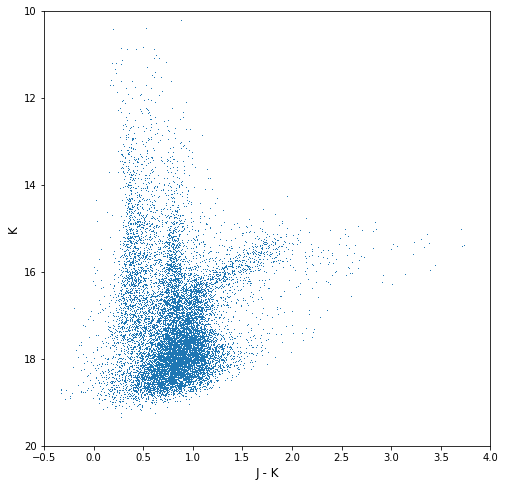

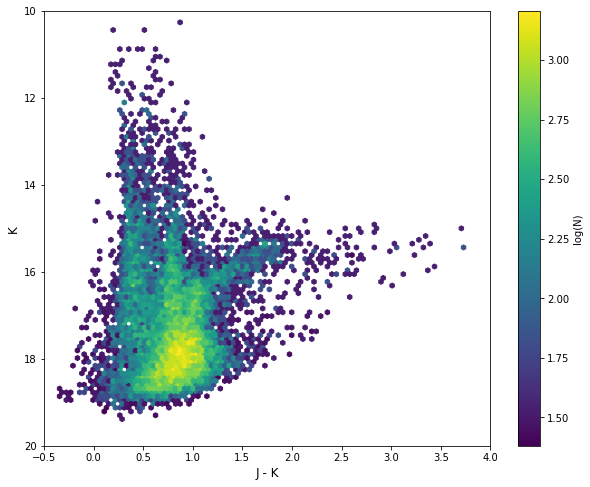

In [7]:
# K vs J-K
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSk, filter_phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSk, filter_phot_data.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 4.0, 20.0, 10.0))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_J-K_hist.pdf')

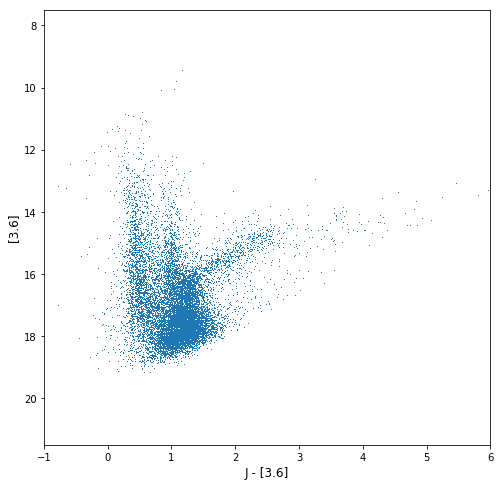

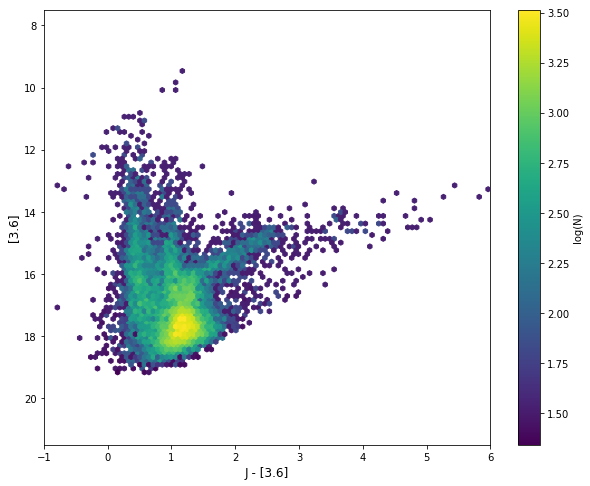

In [8]:
# [3.6] vs J-[3.6]
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSthreesix, filter_phot_data.k36mag, ',')
plt.xlim(-1.0, 6.0)
plt.ylim(21.5, 7.5)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#plt.savefig('[3.6]_vs_J-[3.6]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.0, 6.0)
plt.ylim(21.5, 7.5)
im1 = ax1.hexbin(filter_phot_data.jMINUSthreesix, filter_phot_data.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 6.0, 21.5, 7.5))
ax1.set_xlabel('J - [3.6]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[3.6]_vs_J-[3.6]_hist.pdf')

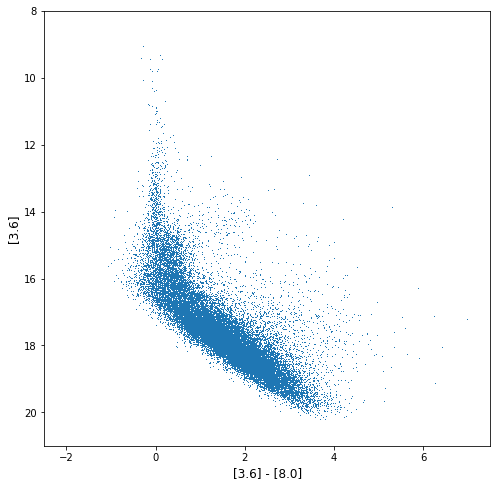

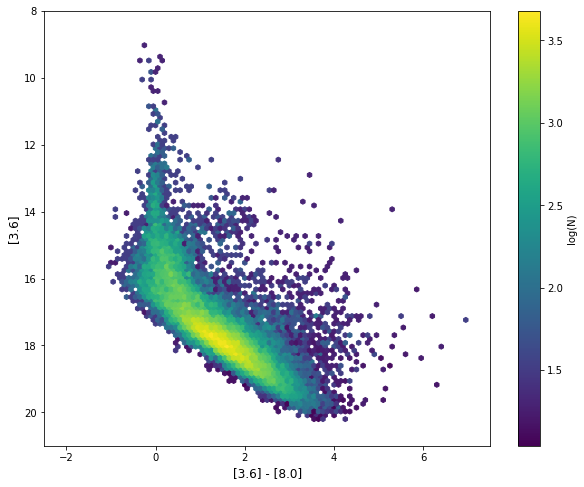

In [9]:
# [3.6] vs. [3.6]-[8.0]
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.threesixMINUSeightzero, filter_phot_data.k36mag, ',')
plt.xlim(-2.5, 7.5)
plt.ylim(21.0, 8.0)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[3.6]', size=12)
#plt.savefig('[3.6]_vs_[3.6]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.5, 7.5)
plt.ylim(21.0, 8.0)
im1 = ax1.hexbin(filter_phot_data.threesixMINUSeightzero, filter_phot_data.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.5, 7.5, 21.0, 8.0))
ax1.set_xlabel('[3.6] - [8.0]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[3.6]_vs_[3.6]-[8.0]_hist.pdf')

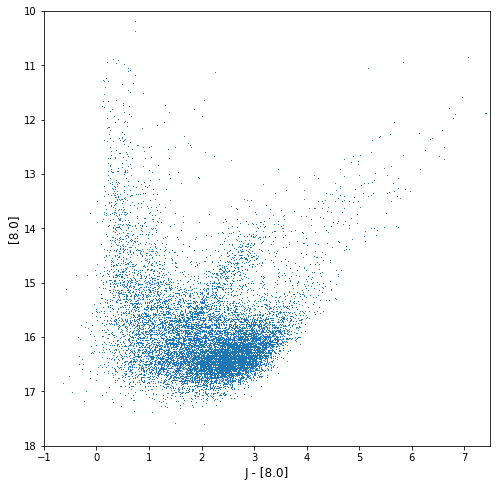

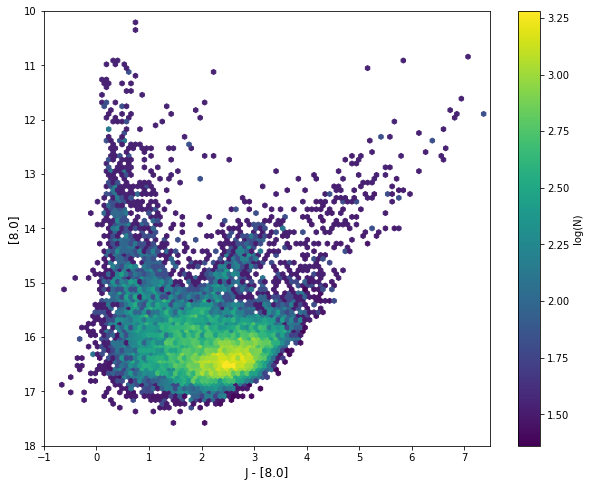

In [10]:
# [8.0] vs J-[8.0]
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSeightzero, filter_phot_data.k80mag, ',')
plt.xlim(-1.0, 7.5)
plt.ylim(18.0, 10.0)
plt.xlabel('J - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#plt.savefig('[8.0]_vs_J-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.0, 7.5)
plt.ylim(18.0, 10.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSeightzero, filter_phot_data.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 7.5, 18.0, 10.0))
ax1.set_xlabel('J - [8.0]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[8.0]_vs_J-[8.0]_hist.pdf')

In [11]:
# These look great!  There's a lot more in this dataset (Sibbons+ 2012) than in the
# previous near-IR catalog (Whitelock+ 2013), however this is due to the wider spatial
# coverage, the deeper photometry (which isn't as much as I had originally expected),
# and that the current dataset has not been cleaned of contaminants.
#
# Now to make the histograms.

/Users/ahirschauer/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


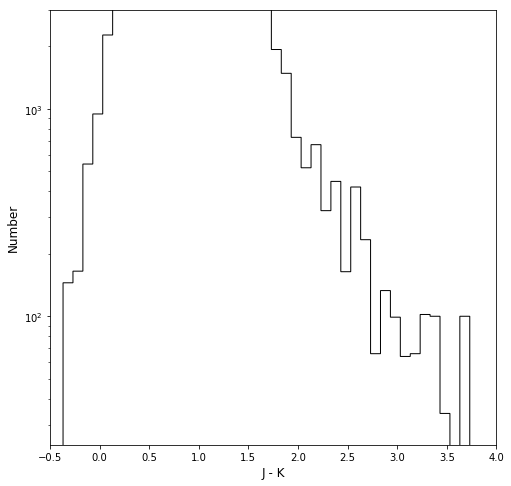

In [12]:
# J vs J-K
# histogram
#
binwidth = 0.1
#bin_number = (max(np.array(jMINUSkDATA.jMINUSk))+binwidth)/binwidth
#print bin_number
bin_number = 121.0
#
fig = plt.figure(figsize = (8,8))
plt.hist(filter_phot_data.jMINUSk, bins=np.arange(min(filter_phot_data.jMINUSk), max(filter_phot_data.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.ylim(0.0, 3000.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.show()
plt.close()

In [13]:
max(filter_phot_data.jMINUSk.values)

10019.132

In [14]:
min(filter_phot_data.jMINUSk.values)

-10018.368